# time series + ML + Python = ❤️ (& `tslearn`)

by Romain Tavenard

# Python toolkits for time series

* Feature extraction / Transformers
  * `seglearn`
  * `cesium`
  * `tsfresh`
* Classification / Forecasting
  * `pyts`
  * `sktime`
  * `pyflux`

# What's `tslearn`?

* Python library
* Diverse ML tasks:
  * feature extraction
  * clustering
  * classification
* `scikit-learn`-like API 
  * `model.fit(X, y)`
  * `model.predict(X)`
  * _etc._

In [1]:
pip install tslearn

Note: you may need to restart the kernel to use updated packages.


# Why use a dedicated library for time series?

Because if you don't...

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt

import numpy
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, \
    TimeSeriesResampler

def plot_clustering(model, X):
    y_pred = model.predict(X)
    plt.figure(figsize=(12, 3))
    for yi in range(model.n_clusters):
        plt.subplot(1, model.n_clusters, yi + 1)
        for xx in X[y_pred == yi]:
            plt.plot(xx.ravel(), "k-", alpha=.2)
        plt.plot(model.cluster_centers_[yi].ravel(), "r-")
        plt.xlim(0, X.shape[1])
        plt.ylim(-4, 4)
        plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
                 transform=plt.gca().transAxes)
        
seed = 0
numpy.random.seed(seed)
X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")
# Keep first 3 classes and only 50 samples
X_train = X_train[y_train < 4][:50]
y_train = y_train[y_train < 4][:50]
X_test = X_test[y_test < 4]
y_test = y_test[y_test < 4]

X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train)
X_test = TimeSeriesScalerMeanVariance().fit_transform(X_test)

sz = X_train.shape[1]

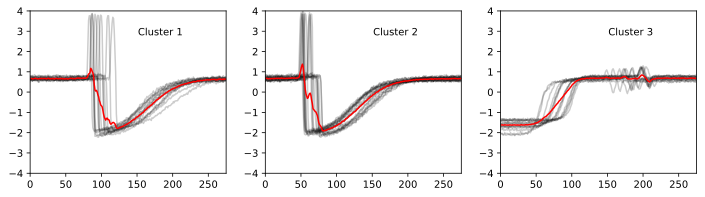

In [3]:
from sklearn.cluster import KMeans
from tslearn.utils import to_sklearn_dataset

X_sklearn = to_sklearn_dataset(X_train)
model = KMeans(n_clusters=3, max_iter=10, random_state=seed)
model.fit(X_sklearn)
plot_clustering(model, X_sklearn)

# Use time series metrics

_eg._ Dynamic Time Warping (DTW [Sakoe, 1978])


In [4]:
from scipy.spatial.distance import cdist

def plot_dtw(s_y1, s_y2, path):
    plt.figure(figsize=(4, 4))

    # definitions for the axes
    left, bottom = 0.01, 0.1
    w_ts = h_ts = 0.2
    left_h = left + w_ts + 0.02
    width = height = 0.65
    bottom_h = bottom + height + 0.02

    rect_s_y = [left, bottom, w_ts, height]
    rect_gram = [left_h, bottom, width, height]
    rect_s_x = [left_h, bottom_h, width, h_ts]

    ax_gram = plt.axes(rect_gram)
    ax_s_x = plt.axes(rect_s_x)
    ax_s_y = plt.axes(rect_s_y)

    mat = cdist(s_y1, s_y2)

    ax_gram.imshow(mat, origin='lower')
    ax_gram.axis("off")
    ax_gram.autoscale(False)
    ax_gram.plot([j for (i, j) in path], [i for (i, j) in path], "w-",
                 linewidth=3.)

    ax_s_x.plot(numpy.arange(s_y2.shape[0]), s_y2, "b-", linewidth=3.)
    ax_s_x.axis("off")
    ax_s_x.set_xlim((0, sz - 1))

    ax_s_y.plot(- s_y1, numpy.arange(s_y1.shape[0]), "b-", linewidth=3.)
    ax_s_y.axis("off")
    ax_s_y.set_ylim((0, sz - 1))

In [5]:
s_x = numpy.array(
    [-0.790, -0.765, -0.734, -0.700, -0.668, -0.639, -0.612, -0.587, -0.564,
     -0.544, -0.529, -0.518, -0.509, -0.502, -0.494, -0.488, -0.482, -0.475,
     -0.472, -0.470, -0.465, -0.464, -0.461, -0.458, -0.459, -0.460, -0.459,
     -0.458, -0.448, -0.431, -0.408, -0.375, -0.333, -0.277, -0.196, -0.090,
     0.047, 0.220, 0.426, 0.671, 0.962, 1.300, 1.683, 2.096, 2.510, 2.895,
     3.219, 3.463, 3.621, 3.700, 3.713, 3.677, 3.606, 3.510, 3.400, 3.280,
     3.158, 3.038, 2.919, 2.801, 2.676, 2.538, 2.382, 2.206, 2.016, 1.821,
     1.627, 1.439, 1.260, 1.085, 0.917, 0.758, 0.608, 0.476, 0.361, 0.259,
     0.173, 0.096, 0.027, -0.032, -0.087, -0.137, -0.179, -0.221, -0.260,
     -0.293, -0.328, -0.359, -0.385, -0.413, -0.437, -0.458, -0.480, -0.498,
     -0.512, -0.526, -0.536, -0.544, -0.552, -0.556, -0.561, -0.565, -0.568,
     -0.570, -0.570, -0.566, -0.560, -0.549, -0.532, -0.510, -0.480, -0.443,
     -0.402, -0.357, -0.308, -0.256, -0.200, -0.139, -0.073, -0.003, 0.066,
     0.131, 0.186, 0.229, 0.259, 0.276, 0.280, 0.272, 0.256, 0.234, 0.209,
     0.186, 0.162, 0.139, 0.112, 0.081, 0.046, 0.008, -0.032, -0.071, -0.110,
     -0.147, -0.180, -0.210, -0.235, -0.256, -0.275, -0.292, -0.307, -0.320,
     -0.332, -0.344, -0.355, -0.363, -0.367, -0.364, -0.351, -0.330, -0.299,
     -0.260, -0.217, -0.172, -0.128, -0.091, -0.060, -0.036, -0.022, -0.016,
     -0.020, -0.037, -0.065, -0.104, -0.151, -0.201, -0.253, -0.302, -0.347,
     -0.388, -0.426, -0.460, -0.491, -0.517, -0.539, -0.558, -0.575, -0.588,
     -0.600, -0.606, -0.607, -0.604, -0.598, -0.589, -0.577, -0.558, -0.531,
     -0.496, -0.454, -0.410, -0.364, -0.318, -0.276, -0.237, -0.203, -0.176,
     -0.157, -0.145, -0.142, -0.145, -0.154, -0.168, -0.185, -0.206, -0.230,
     -0.256, -0.286, -0.318, -0.351, -0.383, -0.414, -0.442, -0.467, -0.489,
     -0.508, -0.523, -0.535, -0.544, -0.552, -0.557, -0.560, -0.560, -0.557,
     -0.551, -0.542, -0.531, -0.519, -0.507, -0.494, -0.484, -0.476, -0.469,
     -0.463, -0.456, -0.449, -0.442, -0.435, -0.431, -0.429, -0.430, -0.435,
     -0.442, -0.452, -0.465, -0.479, -0.493, -0.506, -0.517, -0.526, -0.535,
     -0.548, -0.567, -0.592, -0.622, -0.655, -0.690, -0.728, -0.764, -0.795,
     -0.815, -0.823, -0.821])

s_y1 = numpy.concatenate((s_x, s_x)).reshape((-1, 1))
s_y2 = numpy.concatenate((s_x, s_x[::-1])).reshape((-1, 1))
sz = s_y1.shape[0]

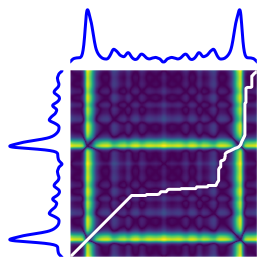

In [6]:
from tslearn.metrics import dtw_path

path, sim = dtw_path(s_y1, s_y2)
plot_dtw(s_y1, s_y2, path)

# $k$-means + DTW

DTW Barycenter Averaging [Petitjean, 2011] to compute barycenters

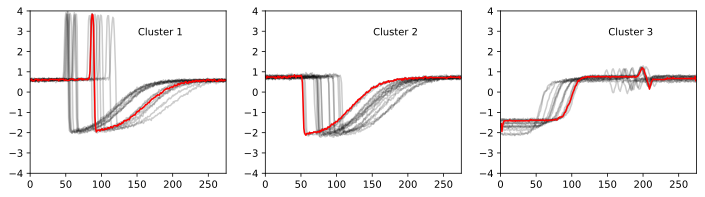

In [7]:
from tslearn.clustering import TimeSeriesKMeans

model = TimeSeriesKMeans(n_clusters=3, metric="dtw", 
                         max_iter=10, random_state=seed)
model.fit(X_train)
plot_clustering(model, X_train)

In [8]:
def plot_support_vectors(sv):
    n_classes = len(sv)

    plt.figure()
    for i, cl in enumerate(range(n_classes)):
        plt.subplot(n_classes, 1, i + 1)
        plt.text(support_vectors[i].shape[1] / 2, 2.5, s="Support vectors for class %d" % (cl))
        for ts in support_vectors[i]:
            plt.plot(ts.ravel())
        plt.xlim(0, support_vectors[i].shape[1])
        plt.ylim(-4, 4)
    plt.tight_layout()

# Time Series Classification

SVM + Global Alignment Kernel [Cuturi, 2011]

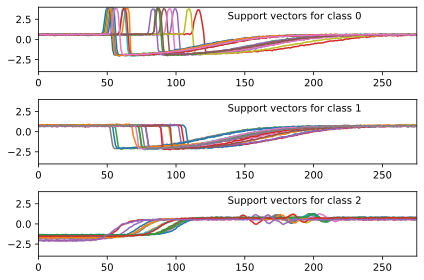

In [9]:
from tslearn.svm import TimeSeriesSVC

clf = TimeSeriesSVC(kernel="gak", gamma=.1, random_state=seed)
clf.fit(X_train, y_train)
support_vectors = clf.support_vectors_time_series_(X_train)
plot_support_vectors(support_vectors)

# Early classification of time series

New in v0.4! 🥳🎉

In [ ]:
# TODO: early classification example from François

# Benefit from great `scikit-learn` features

In [10]:
X_train, y_train, _, _ = CachedDatasets().load_dataset("Trace")

# Keep only timeseries of class 1, 2, 3
X_train = X_train[y_train > 0]
y_train = y_train[y_train > 0]

# Keep only the first 50 timeseries of both train and
# retain only a small amount of each of the timeseries
X_train, y_train = X_train[:50, 50:150], y_train[:50]

from sklearn import set_config

set_config(display='diagram')

In [11]:
from tslearn.neighbors import KNeighborsTimeSeriesClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline

pipeline = GridSearchCV(
    Pipeline([
            ('normalize', TimeSeriesScalerMeanVariance()),
            ('knn', KNeighborsTimeSeriesClassifier())
    ]),
    {'knn__n_neighbors': [1, 3, 10]},
    cv=StratifiedKFold(n_splits=3)
)

pipeline.fit(X_train, y_train)
print(pipeline.best_estimator_)
pipeline

Pipeline(steps=[('normalize', TimeSeriesScalerMeanVariance()),
                ('knn', KNeighborsTimeSeriesClassifier(n_neighbors=1))])


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('normalize',
                                        TimeSeriesScalerMeanVariance()),
                                       ('knn',
                                        KNeighborsTimeSeriesClassifier())]),
             param_grid={'knn__n_neighbors': [1, 3, 10]})

# `tslearn` in figures

* \>10k single lines of code
* \>1k stars on GitHub
* \>1,200 commits (~ at least that many ☕️?)
* \>20 contributors (we welcome newcomers!)

# Contributing

* Why contributing?
  * Open Source rocks!
  * Great learning experience
  * Impact a large community of users (>350k downloads)
* How to contribute?
  * Bug reports
  * Ask for new methods
  * Code, docs, visualizations
  * ... all this through GitHub
* **Job offer**
  * Full time `tslearn` dev open position (1 year)
  * Contact me if interested

# If you use `tslearn`, please cite us!

```bibtex
@misc{tslearn,
      title={tslearn: A machine learning toolkit dedicated to time-series
             data},
      author={Romain Tavenard and Johann Faouzi and Gilles Vandewiele and
              Felix Divo and Guillaume Androz and Chester Holtz and Marie
              Payne and Roman Yurchak and Marc Ru{\ss}wurm and Kushal
              Kolar and Eli Woods},
      year={2017},
      note={\url{https://github.com/tslearn-team/tslearn}}
}
```